The folder structure in a nutshell is explained using this way:

There are two categories of actions: analysis and model processing ( separately having two folders).
```
├── src/
│   ├── data_analysis/
│   │   ├── analysis.py
│   │   └── data_process.py
│   ├── data_process/
│   │   ├── categorical_analysis.py
│   │   └── data_preprocessing.py
│   └── model_training.py
│   └── visualization.py
├── logs/
└── assignment-1.ipynb
```

/Users/cyang6/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_mat

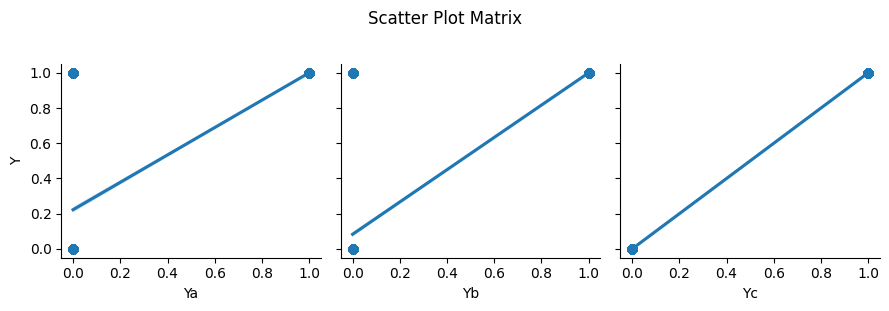

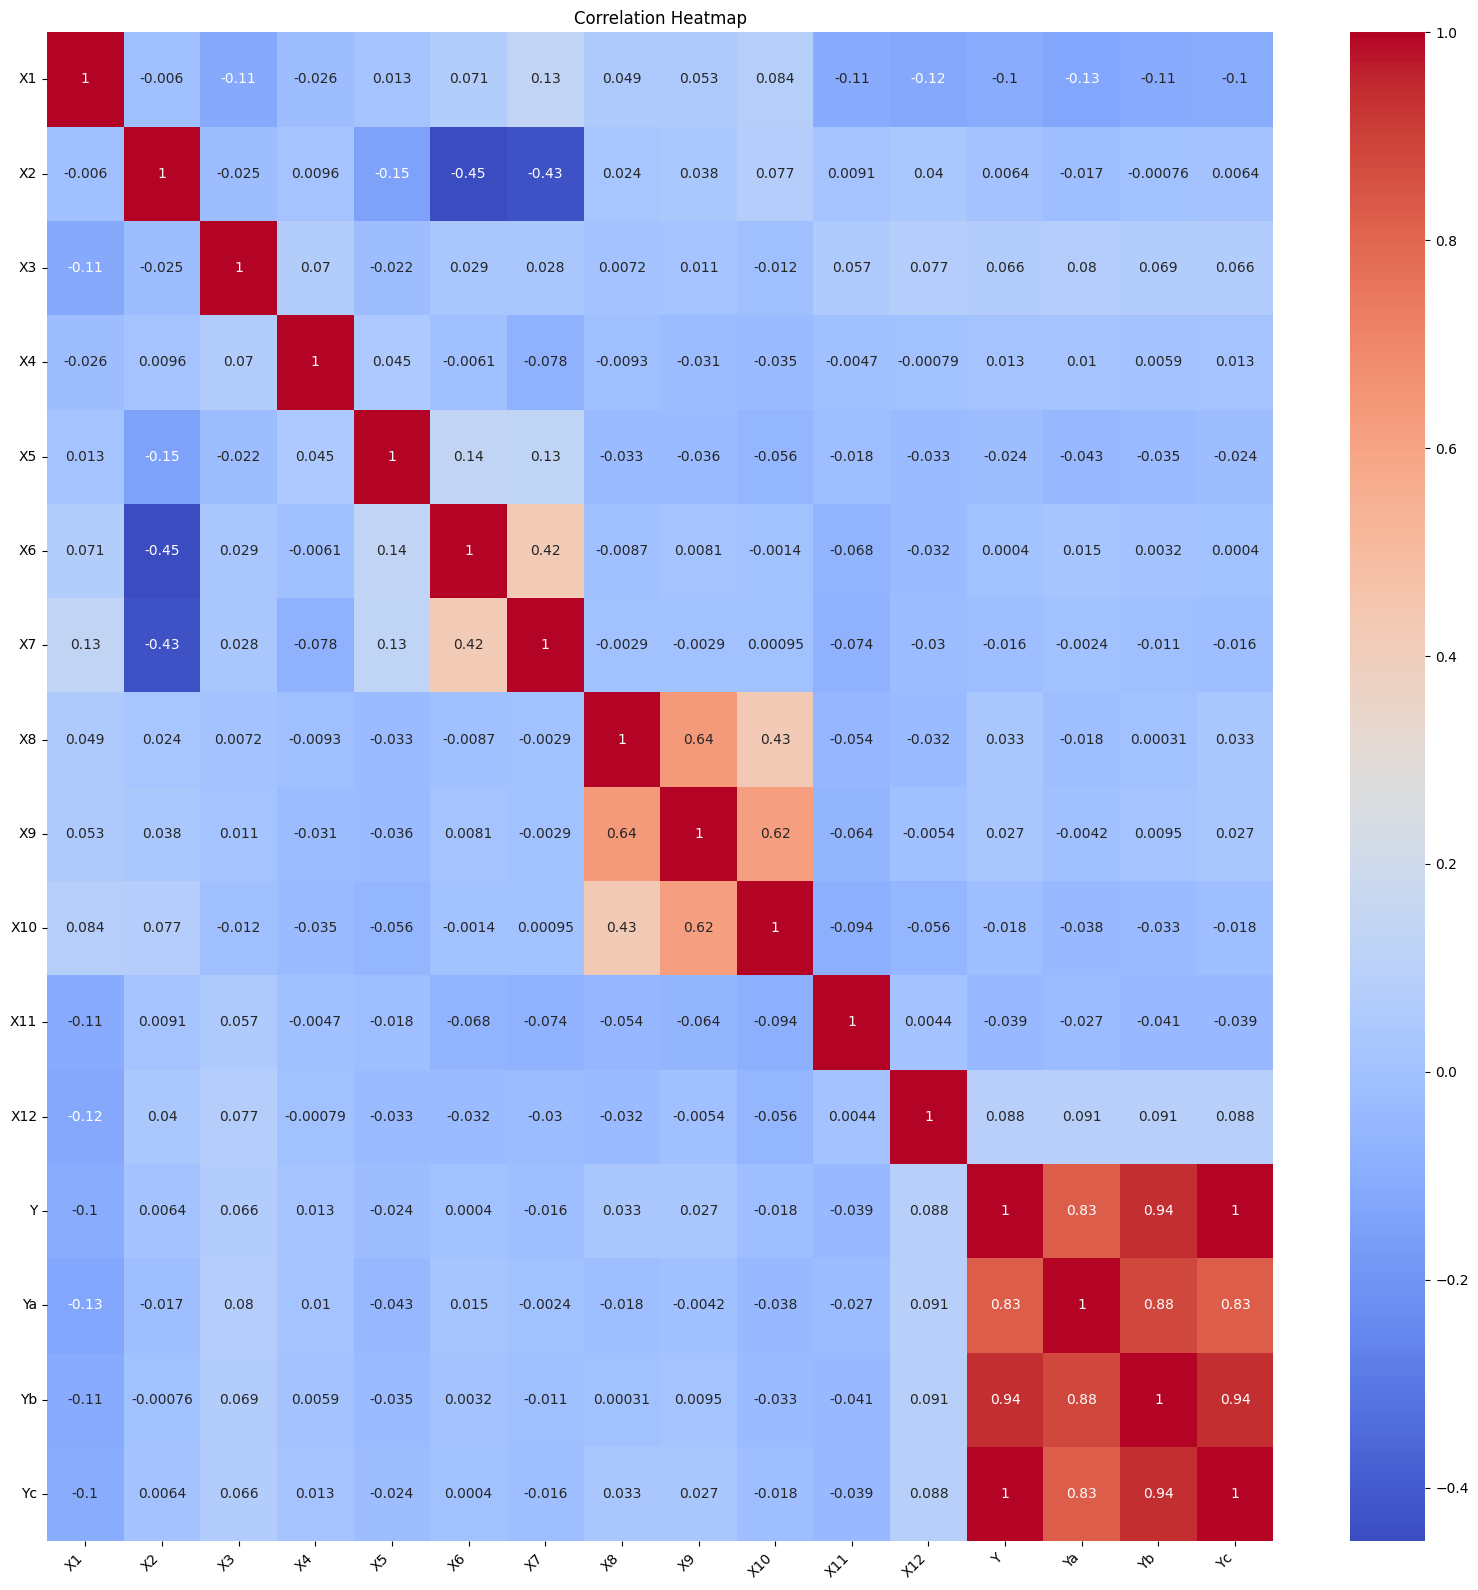

=== Correlation Analysis ===
  Feature        Pearson_r       Spearman_r
0      Ya  0.830 (p=0.000)  0.830 (p=0.000)
1      Yb  0.940 (p=0.000)  0.940 (p=0.000)
2      Yc  1.000 (p=0.000)  1.000 (p=0.000)

=== Mutual Information ===
  Feature  Mutual_Info
2      Yc     0.597798
1      Yb     0.506834
0      Ya     0.421513


In [4]:
# %load_ext autoreload
# %autoreload 2

from data_analysis.analysis import analyze_relationships
from data_analysis.data_process import load_data,clean_data
import matplotlib.pyplot as plt

#load data
data = load_data("../data/P1data5117.csv")
data, label_encoders = clean_data(data)

# call analysis
corr_df, mi_df = analyze_relationships(data)
print("=== Correlation Analysis ===")
print(corr_df)
print("\n=== Mutual Information ===")
print(mi_df.sort_values('Mutual_Info', ascending=False))


In [5]:
ls

__pycache__/        data_analysis/      logs/               model_training.py
assignment-1.ipynb  data_process/       main.py             visualisation.py


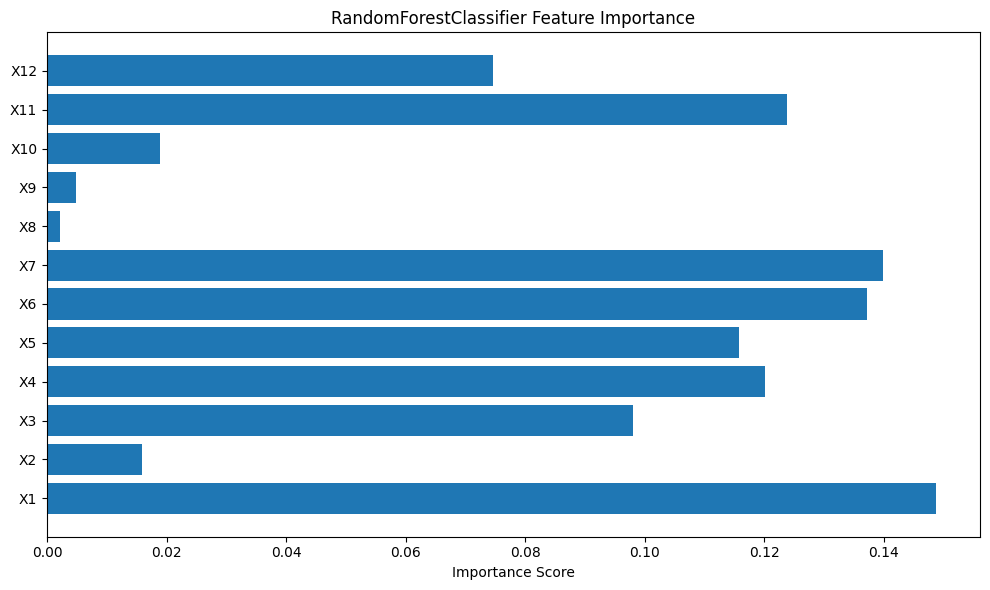

Random Forest Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_

Logistic Regression Best parameters: {'C': 0.01, 'l1_ratio': 0.7, 'penalty': 'elasticnet', 'solver': 'saga'}

Random Forest Performance:
Accuracy: 0.7552
Precision: 0.7351
Recall: 0.7552
F1: 0.6939
AUC-ROC: 0.6767
Best Parameters:
  max_depth: 30
  max_features: sqrt
  min_samples_leaf: 4
  min_samples_split: 2
  n_estimators: 300

Logistic Regression Performance:
Accuracy: 0.7352
Precision: 0.5405
Recall: 0.7352
F1: 0.6230
AUC-ROC: 0.6124
Best Parameters:
  C: 0.01
  l1_ratio: 0.7
  penalty: elasticnet
  solver: saga


ython/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cyang6/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value enco

In [6]:
from data_process.data_preprocessing import load_data, preprocess_data
from model_training import train_models
from visualisation import plot_feature_importance
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess data
# data = load_data('../data/P1data5117.csv')
processed_data = preprocess_data(data,label_encoders)

feature_names = data.drop(columns=['Y', 'Ya', 'Yb', 'Yc']).columns
# Train and evaluate models
results = train_models(
    processed_data['X_train'],
    processed_data['X_test'],
    processed_data['y_train'],
    processed_data['y_test'],
    feature_names= feature_names
)

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            if metric_name == 'Confusion Matrix':
                continue
            elif metric_name == 'Best Params':
                print("Best Parameters:")
                for param, val in value.items():
                    print(f"  {param}: {val}")
            else:
                print(f"{metric_name}: {value:.4f}")


